In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from fbprophet import Prophet

In [6]:
data = pd.read_csv('avocado.csv')

In [7]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [14]:
help(pd.to_datetime)

Help on function to_datetime in module pandas.core.tools.datetimes:

to_datetime(arg, errors='raise', dayfirst=False, yearfirst=False, utc=None, box=True, format=None, exact=True, unit=None, infer_datetime_format=False, origin='unix', cache=True)
    Convert argument to datetime.
    
    Parameters
    ----------
    arg : integer, float, string, datetime, list, tuple, 1-d array, Series
    
        .. versionadded:: 0.18.1
    
           or DataFrame/dict-like
    
    errors : {'ignore', 'raise', 'coerce'}, default 'raise'
    
        - If 'raise', then invalid parsing will raise an exception
        - If 'coerce', then invalid parsing will be set as NaT
        - If 'ignore', then invalid parsing will return the input
    dayfirst : boolean, default False
        Specify a date parse order if `arg` is str or its list-likes.
        If True, parses dates with the day first, eg 10/11/12 is parsed as
        2012-11-10.
        with day first (this is a known bug, based on dateutil 

In [16]:
data.Date = pd.to_datetime(data.Date, format = '%Y-%m-%d')

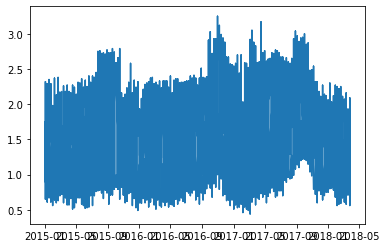

In [42]:
data = data.sort_values('Date')
plt.plot(data.Date, data['AveragePrice'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text xticklabel objects>)

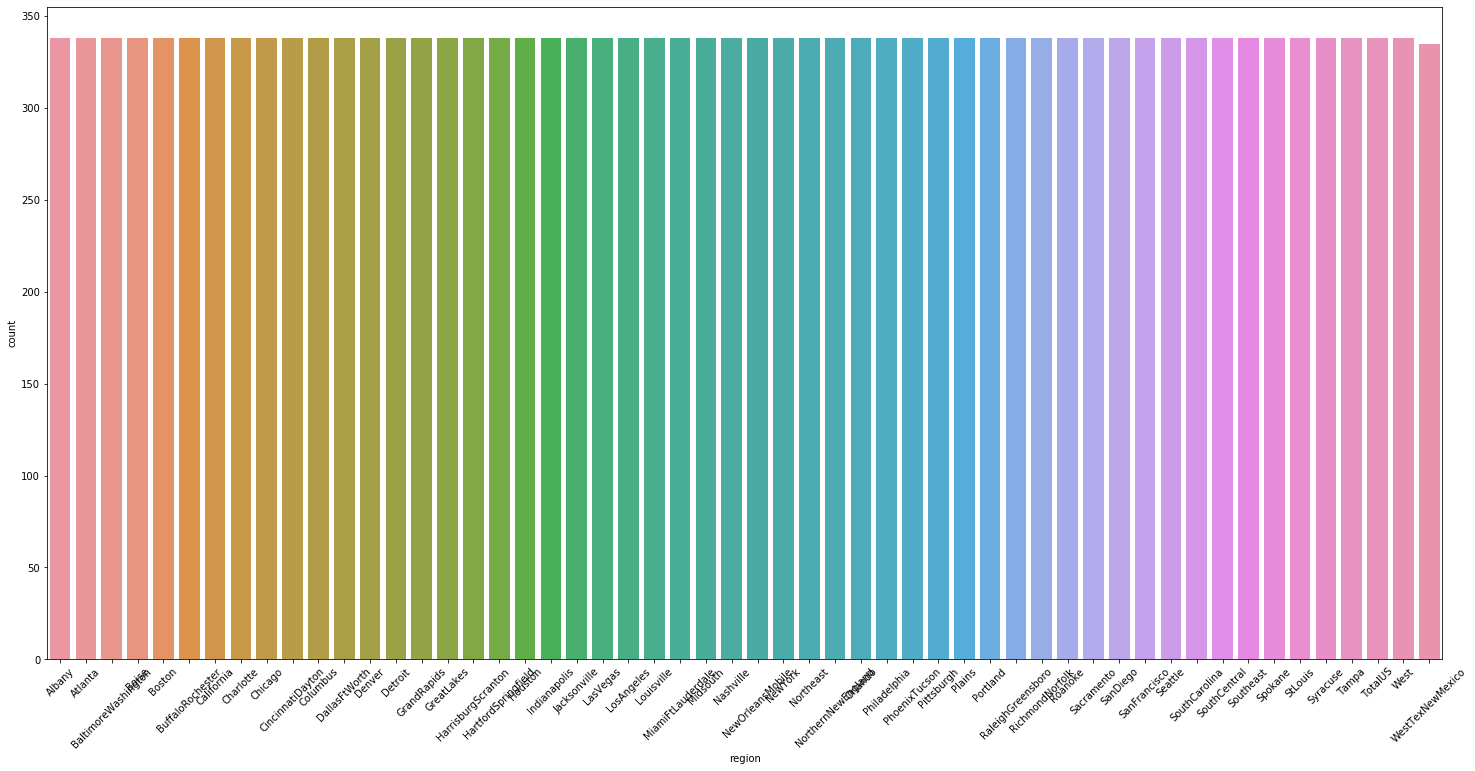

In [21]:
plt.figure(figsize = (25,12))
sns.countplot(x = 'region', data = data)
plt.xticks(rotation = 45)

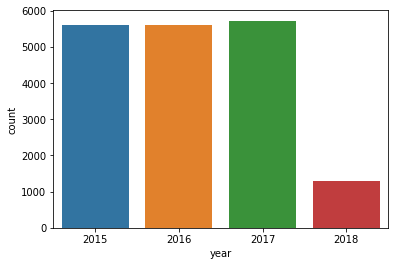

In [22]:
sns.countplot(x = 'year', data=data)

In [25]:
data_prophet = data[['Date','AveragePrice']]

In [26]:
data_prophet

,Date,AveragePrice
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28
...,...,...
18244,2018-02-04,1.63
18245,2018-01-28,1.71
18246,2018-01-21,1.87
18247,2018-01-14,1.93


In [27]:
data_prophet = data_prophet.rename(columns = {'Date':'ds', 'AveragePrice':'y'})

In [28]:
m = Prophet()

In [29]:
m.fit(data_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

In [31]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.499008,0.891244,1.895977,1.499008,1.499008,-0.113581,-0.113581,-0.113581,-0.113581,-0.113581,-0.113581,0.0,0.0,0.0,1.385428
1,2015-01-04,1.499008,0.888664,1.843176,1.499008,1.499008,-0.113581,-0.113581,-0.113581,-0.113581,-0.113581,-0.113581,0.0,0.0,0.0,1.385428
2,2015-01-04,1.499008,0.916068,1.844731,1.499008,1.499008,-0.113581,-0.113581,-0.113581,-0.113581,-0.113581,-0.113581,0.0,0.0,0.0,1.385428
3,2015-01-04,1.499008,0.901754,1.846861,1.499008,1.499008,-0.113581,-0.113581,-0.113581,-0.113581,-0.113581,-0.113581,0.0,0.0,0.0,1.385428
4,2015-01-04,1.499008,0.880866,1.870290,1.499008,1.499008,-0.113581,-0.113581,-0.113581,-0.113581,-0.113581,-0.113581,0.0,0.0,0.0,1.385428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18609,2019-03-21,1.174168,0.564509,1.638874,0.994729,1.348138,-0.087171,-0.087171,-0.087171,-0.087171,-0.087171,-0.087171,0.0,0.0,0.0,1.086997
18610,2019-03-22,1.173464,0.540635,1.592984,0.993877,1.347931,-0.085488,-0.085488,-0.085488,-0.085488,-0.085488,-0.085488,0.0,0.0,0.0,1.087976
18611,2019-03-23,1.172760,0.558430,1.618136,0.992854,1.347741,-0.083530,-0.083530,-0.083530,-0.083530,-0.083530,-0.083530,0.0,0.0,0.0,1.089230
18612,2019-03-24,1.172056,0.553102,1.579492,0.991653,1.347761,-0.081315,-0.081315,-0.081315,-0.081315,-0.081315,-0.081315,0.0,0.0,0.0,1.090741


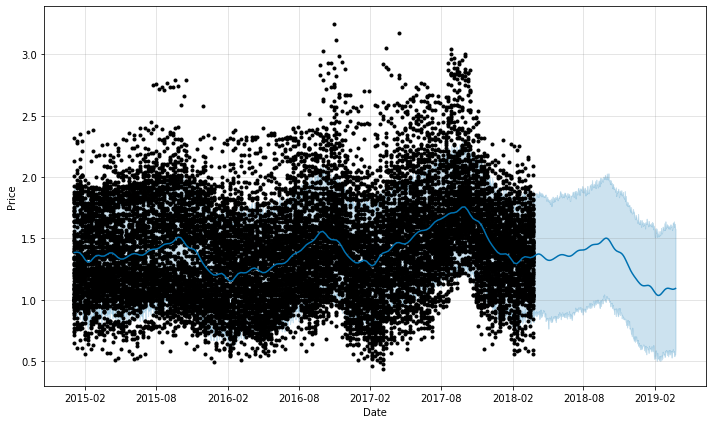

In [32]:
figure = m.plot(forecast, xlabel='Date', ylabel = 'Price')

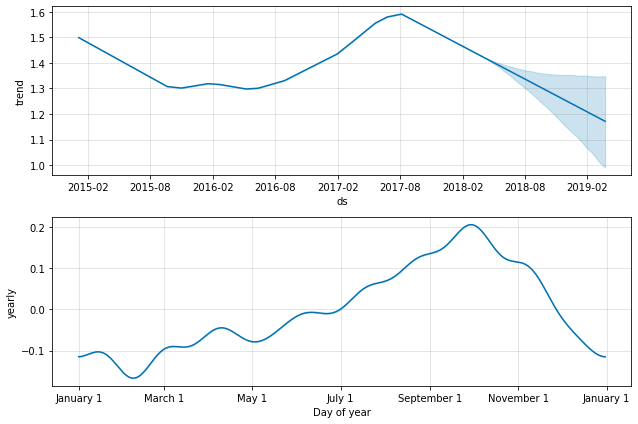

In [33]:
figure = m.plot_components(forecast)

In [38]:
data_west = pd.read_csv('avocado.csv')
data_west = data_west[data_west['region']=='West']
data_west.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2704,0,2015-12-27,0.83,5291979.63,2038443.68,1717599.45,125254.82,1410681.68,838267.79,567269.76,5144.13,conventional,2015,West
2705,1,2015-12-20,0.88,4737649.03,2017331.24,1314711.00,130849.60,1274757.19,843691.13,417746.45,13319.61,conventional,2015,West
2706,2,2015-12-13,0.85,4899439.92,1798995.46,1596329.01,134101.62,1370013.83,851506.76,517936.19,570.88,conventional,2015,West
2707,3,2015-12-06,0.75,6202513.84,2097720.52,2051392.83,107568.34,1945832.15,1360760.83,582846.33,2224.99,conventional,2015,West
2708,4,2015-11-29,0.99,3719603.21,1461861.54,1216811.00,104219.76,936710.91,688674.00,247318.15,718.76,conventional,2015,West


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


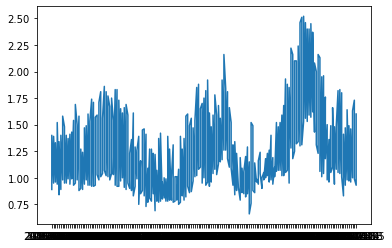

In [41]:
sample = data_west.sort_values('Date')
plt.plot(sample['Date'], sample['AveragePrice'])

In [43]:
wm = Prophet()

In [44]:
sample = sample[['Date','AveragePrice']]

In [48]:
sample = sample.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [49]:
wm.fit(sample)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
future = wm.make_future_dataframe(periods = 365)
forecast = wm.predict(future)

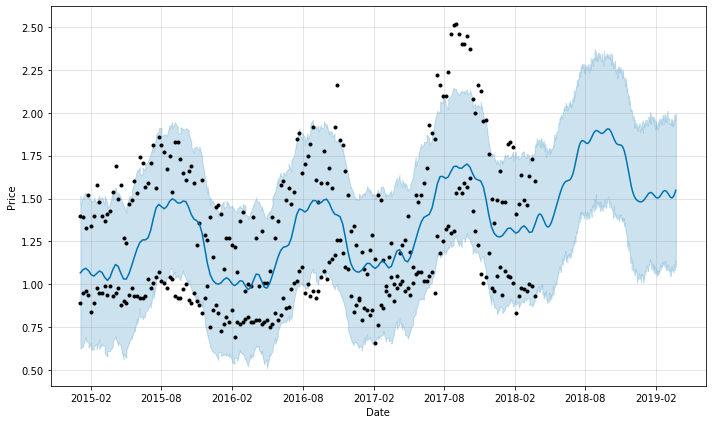

In [52]:
figure = wm.plot(forecast, xlabel='Date', ylabel = 'Price')

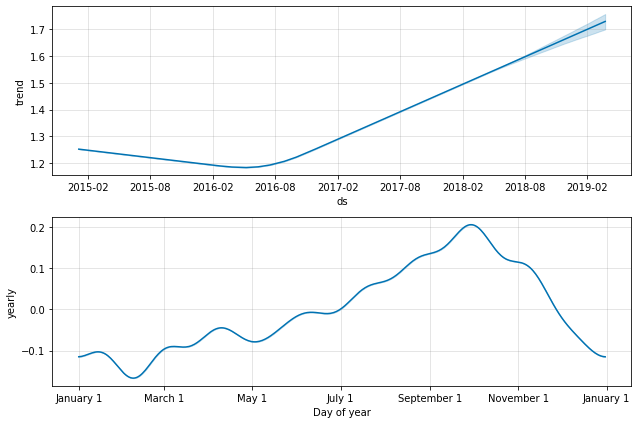

In [53]:
figure = m.plot_components(forecast)